# **RNNs part 3: Different types of RNNs tasks**

# **Types of RNNs Tasks**

- Theme of this notebook: **shapes**.
- What are the different types of problems an RNN can solve?  

When we are talking about deep learning, this is a very important topic.

You always want to **keep track of the shape of everything in your neural network**. Once you know the shape of something, the visualization of it becomes implicit.

When we talk about different types of tasks that an RNN can solve, we are not talking about different applications, (although we will be looking at several simple examples).
- We mean: **what is the *shape* of the data when the RNN is performing some task**?
- Given an input of some shape, what kinds of shapes can I get at the output?



# **RNN Input**

- T x D matrix.
- T = sequence length (usually, the number of words);
- D = input dimensionality (size of word vectors).

If I have 5 words, and my word vectors are of size 50, then the input to my LSTM or GRU will be of size 5 x 50.

**The first thing we always do when we put words into a neural network is word embeddings - conversion of the words into the word vectors**.

Each word becomes a word vector. If I have 5 words, that is going to give me 5 word vectors. 

Suppose my word vectors are of size 50. As seen for the CNNs, we actually have to choose the vectors' sizes  in the case where you are loading-in train embeddings (then, you have limited size selection options).
- Let's say we choose a D = 50. Then, I have 5 word vectors, each of them of size T = 50, so my input is 5 x 50.
- Once I have this sequence of words, I can pass it through any RNN unit, such as a GRU, LSTM, or even a simple recurrent unit.


# **RNN Input for a Time Series**

Let's think of another situation where we might have a sequence of vectors: suppose I want to track the weather at several locations over time.

So I pick **10 different locations and, every hour, I record the temperature at each location**. Let's say I do this for an entire day. So what does that give me?
- **At each point in time, I have 10 different temperatures** corresponding to the 10 different locations. 
- That means that, in this case, **D = 10**. 
- Since there are **24 hours in a day, I recorded a sequence of 24 observations**. 
- Then, **T = 24**, and my data will be of size 24 x 10.

Notice that in either of these situations, whether we are measuring the weather, or we are looking at sentences, the **result I get is a T x D input signal into my RNN**.

# **RNN Output**

Let's say I take my input, whatever it is, and I pass it through an RNN.
- I know that, for each input xₜ, I can calculate the hidden state hₜ and the output prediction yₜ.
- **What is the meaning of yₜ**? 

Example:
- Suppose I am doing spam classification: given the text in an email, I would like to know if this is a spam email or if it is not.
- Also, suppose the input email contains 100 words. That means I will end up with a sequence of 100 word vectors: [x1, x2, ..., x100]. 
- For each of these, I can calculate [y1, ..., y100].

Which of these Ys do I care about? Remember that I only have one question, which has a "yes" or "no" answer: "Is this email spam or not?"

It makes sense then to take 100 as my answer, since only y100 has seen the entire email. If I look at some earlier output, like y50, it would mean that I have only read half the email (50/100), which may not be enough.

In fact, if you draw this as a diagram, basically, you see that what we can do is **to simply ignore all of the activities except 100, and to only calculate y100**.

Remember that this is easy to accomplish in Keras: we just pass-in **return_sequences = False**, so that **it will only return the last RNN unit output**.


# **Single Output for the RNN: Fancy Method**

We do not necessarily know where the useful state may be.
- Example: the email may start with "Hi, I am a Nigerian Prince". This first sentence would be enough for classifying the email as spam.

There is actually a fancier way to get just one output for an RNN, **instead of considering the entire sequence of outputs**. The answer is the Global Max Pooling.

Remember that the outputs [y1, ..., yt] is a sequence of numbers. **Global Max Pooling verifies a sequence of numbers and, regardless of its length, just returns its maximum value**.
- This can be useful in spam classification, since a very obvious spam word may appear in the middle of an email or even near its beginning.
- This is the case of the abovementioned email with the "Nigerian Prince". You do not have to read to the end of the email to know that it is spam, and if you did read the whole email, you might end up losing that information by the time you got to the end.

We claim that **LSTMs are really good at learning long-term dependencies, but there is still a limit**. 
- This appears in machine translation and in all types of tasks. 
- Basically, **LSTMs are still better at processing short sequences than they are at very long sequences**.

In any case, **Global Max Pooling allows us to consider all the activities, but still only get a single output. We do not have to choose the last one, since that may not be the best one** (the best may be at the beginning or at the middle of the sentence, as in the case of the spam email).

It makes sense to take only one Y as my output prediction
- **If I have 1 output prediction over K classes, then my output should be a vector of size K**.

# **Parts-of-Speech Tagging**

- We would like to know, for each word, whether it is a noun, verb, adjective, etc.
- This is a slightly more complex problem, which is also NLP related, and is called Parts-of-Speech Tagging.

Why are RNNs good models for this task? It has to do with the fact that **some words are ambiguous**. For example: it is not possible to say that milk is definitely a noun or is definitely a verb, because the word milk can be either.
- **The model must take into account the context words**:

```
"I went to the grocery store and I bought milk today." - "milk" is a noun.

"The thief wanted to milk her victims out of their savings." - "milk" is a verb. 
```

The use of an RNN is important for this problem, since you have to take into account the other words of the sentence.

The other important part of the Parts-of-Speech Tagging problem is that we need to make a prediction for every word we see (we want to classify each word into the correct part of speech). 

Therefore, this is not like spam classification, where we just make one prediction for the entire sequence. Each word in the sentence will have a corresponding parts of speech tag.

So in this case, if I have x1 up to x100, then I must also have y1 up to y100. **Each of those Ys is going to represent the predicted parts of speech tag for the corresponding word**.

# **Back to shapes**

- Both input and output are of length T;
- Each output presents 1 of K possible values;
- Output is of shape T x K.

# **Machine Translation**

- Example where we do not just have one output, but many.
- For example: I have an input sentence in English, and then I predict an output sentence in Japanese.
- If I pass-in 100 words in English, it is most certainly not the case that the Japanese translation also has 100 words.
- This is a situation where the input sequence length is different from the output sequence length.

In this case, we usually call the shape of the input Tₓ and the shape of the output Ty. Then, the output will be of size Ty x K.

# **Categories of Tasks**

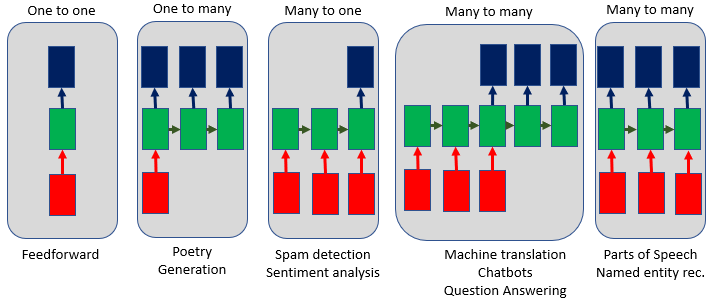


It is possible to categorize each type of task: 
- You can think of a regular feedforward neural network as a one to one task. You have one input and you get one output. For example, I pass-in an image and I tell you what object is in that image.
- You can think of things like **spam classification and sentiment classification as many to one: the input sequence contains many things, but the output is just one thing (positive sentiment, or negative sentiment; spam or not spam)**.
- You can think of tasks like parts of speech, tagging and machine translation as many to many. The input is a sequence of many things, and the output is also a sequence of many things.

Notice in the diagram above that there are two different kinds of many to many.
- One of these we have already talked about: the input sequence length is the same as the output sequence length. 
- There is also another type of many to many, where the lengths are different.

There's also a concept of one to many: in general, you can think of this as text generation. It is present in tasks such as generating poetry.